Co ma być na prezentacji: opis tematu, opis problemu, opis matematyki, ciekawy zbiór(to efekt wow), wszyscy muszą coś przedstawić

# I. Zarys matematyczny

### Regresja parametryczna i nieparametryczna (prezentacja problemu)
Analiza regresji jest techniką statystyczną pozwalająca opisywać związki zachodzące pomiędzy zmiennymi objaśniającymi a objaśnianymi.

Cechą wspólną różnych rodzajów regresji parametrycznej jest to, że musimy znać lub założyć na wstępie jakąś matematyczną zależność wiążącą zmienne wejściowe i wyjściowe. 

Zadanie znalezienia wspomnianej postaci matematycznej nie zawsze jest łatwe do wykonania, a czasami wręcz niewykonalne. W takich sytuacjach warto rozważyć użycie jednej z metod nieparametrycznych, która nie wymaga w żadnym miejscu przyjmowania założeń co do postaci funkcji wiążącej dane wejściowe i wyjściowe.

Często jest również tak, że nawet jeśli użycie metod parametrycznych jest uzasadnione, metody nieparametryczne po prostu łatwiej jest zastosować, gdyż nie trzeba brać pod uwagę specyficznych założeń, głównie dotyczących rozkładu populacji.

Przykładem takiej metody nieparametrycznej jest regresja jądrowa.

#### Regresja jądrowa
Załóżmy że mamy dane dwie jednowymiarowe zmienne losowe X,Y. Uzyskana z nich próba losowa długości n ma postać: $$(x_{1}, y_{1}), ..., (x_{n}, y_{n})$$

Poszukujemy funkcji f, która najlepiej charakteryzowałaby ew. zależność między zmiennymi losowymi X oraz Y. Jej
estymator $\hat m(x)$ wyznacza się tak, aby zminimalizować wyrażenie
$$\sum_{i=1}^{n} [y_{i} - m(x_{i})]^2$$

Zmienne losowe są powiązane ze sobą relacją $y_{i} = m(x_{i})+e_{i}$, gdzie $e_{i}$ to biały szum o pewnych określonych właściwościach statystycznych. Funkcja $m(x)$ opisuje warunkową wartość oczekiwaną zmiennej losowej $Y$ pod warunkiem, że zmienna $X$ przyjęła zadaną wartość $x$, czyli $m(x) = E(Y|X=x)$. W odróżnieniu od metod estymacji parametrycznej, estymator $\hat m(x)$ nie ma postaci funkcji analitycznej a jest po prostu pewną nieznaną funkcją.

Załóżmy, iż chcemy wyznaczyć wartość $\hat m(x)$ biorąc pod uwagę punkty z jego otoczenia $D_{x}=[x-b, x+b], b>0.$ Wówczas $\hat m(x)$ można estymować następującym wyrażeniem: 
$$\hat m(x) = \frac{\sum_{x_{i}D_{x}}y_{i}}{|x_{i} \in D_{x}|} $$
gdzie $|x_{i} \in D_{x}|$ jest liczbą elementów wewnątrz $D_{x}$.

Inaczej $\hat m(x_{t})$ można zapisać w postaci: 
$$\hat m(x_{t}) = \frac{\sum_{i=1}^{n} w_{ix}y_{i}}{\sum_{i=1}^{n} w_{ix}} $$
gdzie $w_{ix} =$ 0 lub 1 zwane jest wagą.

Powyższe równanie jest po prostu średnią ważoną. Dane, którym przypisano większe wagi mają większy udział w określeniu średniej ważonej niż dane, którym przypisano mniejsze wagi.

W praktyce wagi $w_{ix}$ zastępowane są przez funkcją o postaci:
$$w_{ix} = \frac{1}{h}K (\frac{x - x_{i}}{h}) = K(x-x_{i}),$$
gdzie $K(x)$ jest jądrem estymatora i najczęściej przyjmuje postać funkcji gaussowskiej:
$$K(x) = \frac{1}{\sqrt{2\pi}} exp (-\frac{x^2}{2}),$$
natomiast $h$ jest pewnym ustalonym, dodatnim współczynnikiem wygładzenia (ramką, otoczeniem).

Po podstawieniupotrzymujemy podstawową postać estymatora regresji zwanego estymatorem Nadaraya-Watsona
$$\hat m(x_{t}) = \frac{\sum_{i=1}^{n} K (\frac{x - x_{i}}{h})y_{i}}{\sum_{i=1}^{n} K (\frac{x - x_{i}}{h})} = \sum_{i=1}^{n} w_{i}y_{i}$$

Bardzo istotne znaczenie dla kształtu linii regresji ma właściwy dobór współczynnika wygładzania h.

# TODO: II. Implementacja

In [981]:
# TODO:

# III. Regresja jądrowa na sztucznych danych.

In [982]:
# Tu na regresja jądrowa na sztucznych danych

# IV. Regresja jądrowa na realnych danych.

Happiness and Alcohol dataset - Zbiór danych zawierający informacje o relacjach między spożyciem alkoholu, GDP i współczynnikiem szczęscia. [0]<br>
HDI - Miernik opisujący stopień rozwoju społeczno-ekonomicznego poszczególnych krajów [1]<br>
GDP - Miernik opisujący zagregowaną wartość dóbr i usług finalnych wytworzonych przez narodowe i zagraniczne czynniki produkcji na terenie danego kraju w określonej jednostce czasu. [2]<br>
Współczynnik szczęścia - Miernik łączący PKB, wsparcie społeczne, przewidywaną długość życia, wolność, hojność populacji i poziom korupcji. [3]

In [983]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

In [984]:
data = pd.read_csv('data2/HappinessAlcoholConsumption.csv')

data = data[['HDI', 'GDP_PerCapita', 'Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita', 'HappinessScore']]
data['GDP_PerCapita'] = data['GDP_PerCapita'].apply(lambda x: x*1000)
data = data[data['GDP_PerCapita'] < 200000]

In [985]:
matplotlib.rcParams['figure.figsize'] = [20, 5]

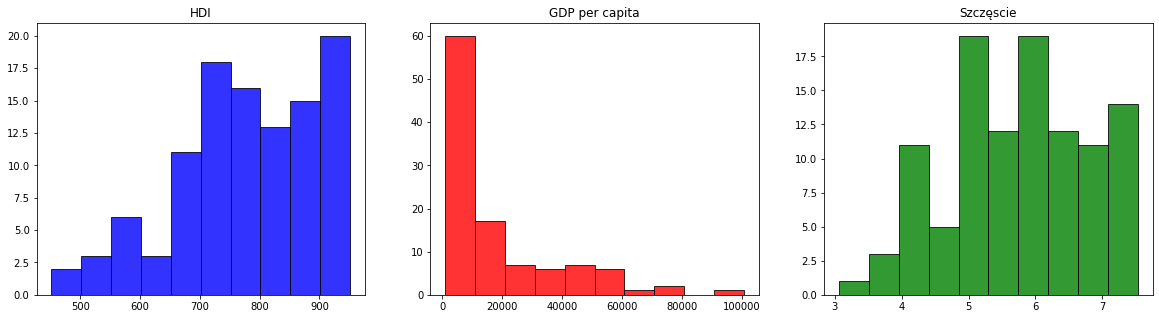

In [986]:
fig, axs = plt.subplots(1, 3)

axs[0].hist(data['HDI'], color='blue', edgecolor='k', alpha=0.8)
axs[0].set_title('HDI')
axs[0].grid(False)

axs[1].hist(data['GDP_PerCapita'], color='red', edgecolor='k', alpha=0.8)
axs[1].set_title('GDP per capita')
axs[1].grid(False)

axs[2].hist(data['HappinessScore'], color='green', edgecolor='k', alpha=0.8)
axs[2].set_title('Szczęscie')
axs[2].grid(False)

[Text(0.5, 0, 'L / rok')]

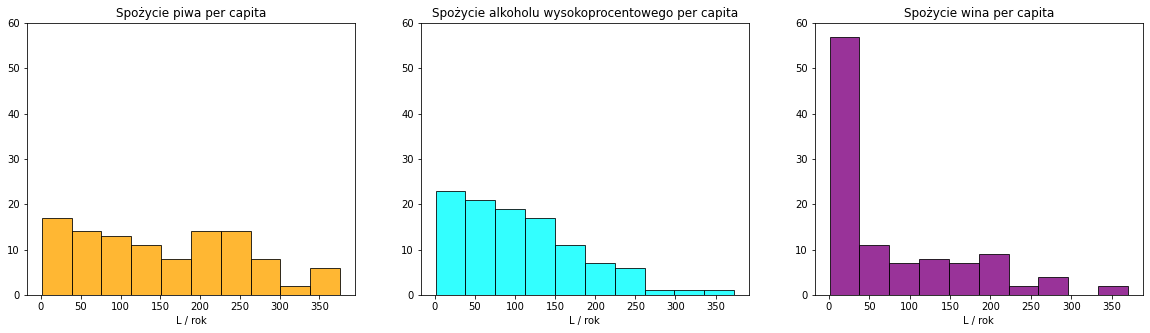

In [987]:
fig, axs = plt.subplots(1, 3)

axs[0].hist(data['Beer_PerCapita'], color='orange', edgecolor='k', alpha=0.8)
axs[0].set_ylim([0, 60])
axs[0].grid(False)
axs[0].set_title('Spożycie piwa per capita')

axs[1].hist(data['Spirit_PerCapita'], color='cyan', edgecolor='k', alpha=0.8)
axs[1].set_ylim([0, 60])
axs[1].grid(False)
axs[1].set_title('Spożycie alkoholu wysokoprocentowego per capita')

axs[2].hist(data['Wine_PerCapita'], color='purple', edgecolor='k', alpha=0.8)
axs[2].set_ylim([0, 60])
axs[2].grid(False)
axs[2].set_title('Spożycie wina per capita')

axs.flat[0].set(xlabel='L / rok')
axs.flat[1].set(xlabel='L / rok')
axs.flat[2].set(xlabel='L / rok')

In [988]:
matplotlib.rcParams['figure.figsize'] = [25, 5]

[Text(0.5, 0, 'Spożycie wina per capita')]

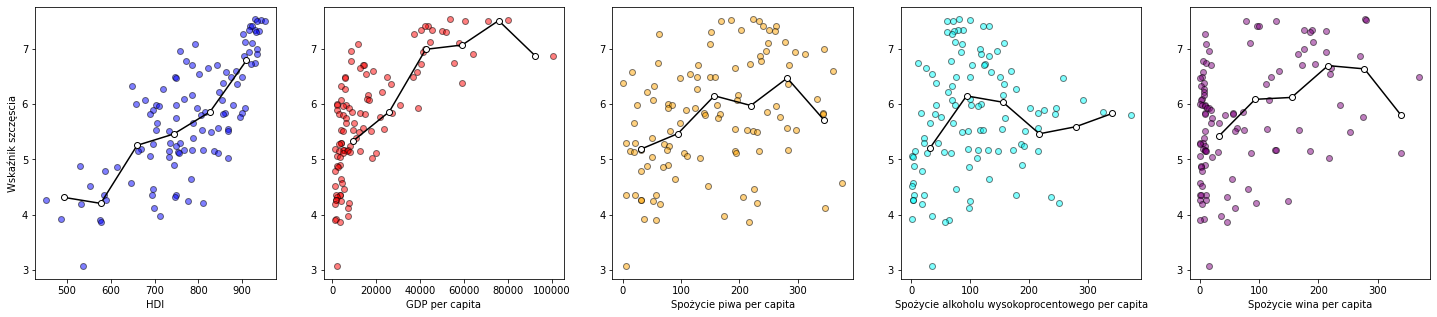

In [989]:
fig, axs = plt.subplots(1, 5)

axs[0].scatter(data['HDI'], data['HappinessScore'], c='blue', edgecolor='k', alpha=0.5)
bin_means, bin_edges, binnumber = stats.binned_statistic(data['HDI'], data['HappinessScore'], statistic='mean', bins=6)
bin_centers = bin_edges[1:] - (bin_edges[1] - bin_edges[0])/2
axs[0].plot(bin_centers, bin_means, color='k', marker="o", markerfacecolor="white")

axs[1].scatter(data['GDP_PerCapita'], data['HappinessScore'], c='red', edgecolor='k', alpha=0.5)
bin_means, bin_edges, binnumber = stats.binned_statistic(data['GDP_PerCapita'], data['HappinessScore'], statistic='mean', bins=6)
bin_centers = bin_edges[1:] - (bin_edges[1] - bin_edges[0])/2
axs[1].plot(bin_centers, bin_means, color='k', marker="o", markerfacecolor="white")

axs[2].scatter(data['Beer_PerCapita'], data['HappinessScore'], c='orange', edgecolor='k', alpha=0.5)
bin_means, bin_edges, binnumber = stats.binned_statistic(data['Beer_PerCapita'], data['HappinessScore'], statistic='mean', bins=6)
bin_centers = bin_edges[1:] - (bin_edges[1] - bin_edges[0])/2
axs[2].plot(bin_centers, bin_means, color='k', marker="o", markerfacecolor="white")

axs[3].scatter(data['Spirit_PerCapita'], data['HappinessScore'], c='cyan', edgecolor='k', alpha=0.5)
bin_means, bin_edges, binnumber = stats.binned_statistic(data['Spirit_PerCapita'], data['HappinessScore'], statistic='mean', bins=6)
bin_centers = bin_edges[1:] - (bin_edges[1] - bin_edges[0])/2
axs[3].plot(bin_centers, bin_means, color='k', marker="o", markerfacecolor="white")

axs[4].scatter(data['Wine_PerCapita'], data['HappinessScore'], c='purple', edgecolor='k', alpha=0.5)
bin_means, bin_edges, binnumber = stats.binned_statistic(data['Wine_PerCapita'], data['HappinessScore'], statistic='mean', bins=6)
bin_centers = bin_edges[1:] - (bin_edges[1] - bin_edges[0])/2
axs[4].plot(bin_centers, bin_means, color='k', marker="o", markerfacecolor="white")

axs.flat[0].set(ylabel="Wskaźnik szczęscia", xlabel='HDI')
axs.flat[1].set(xlabel='GDP per capita')
axs.flat[2].set(xlabel='Spożycie piwa per capita')
axs.flat[3].set(xlabel='Spożycie alkoholu wysokoprocentowego per capita')
axs.flat[4].set(xlabel='Spożycie wina per capita')

In [990]:
# TODO: binned scatterplot

In [991]:
# TODO: regresja jądrowa na realnych danych

# V. Porównanie z innymi metodami regresji.

In [992]:
# Tu Porównanie z innymi metodami regresji (wykres + score)

In [993]:
# Regresja liniowa

In [994]:
# Regresja wielomianowa

In [995]:
# Ridge regression

# VI. Źródła
0. \- https://www.kaggle.com/datasets/marcospessotto/happiness-and-alcohol-consumption
1. \- https://pl.wikipedia.org/wiki/Wska%C5%BAnik_rozwoju_spo%C5%82ecznego
2. \- https://pl.wikipedia.org/wiki/Produkt_krajowy_brutto
3. \- https://worldpopulationreview.com/country-rankings/happiest-countries-in-the-world
4. \- 